# Tópico 16 – Padronização [<img src="images/colag_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 6.5%;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas%2FT%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o%2F16%20%E2%80%93%20Padronizacao.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 3.25%;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas%2FT%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o%2F16%20%E2%80%93%20Padronizacao.ipynb)

Nesta aula, vamos introduzir e explorar o conceito de padronização, e motivar a importância de se padronizar certos conjuntos de variáveis para uma análise mais coerente.

### Resultados Esperados

1. Formalizar apropriadamente os conceitos de Média, Mediana, Desvio Padrão e Variância.
1. Expandir a noção de como as estatísticas descritivas podem ser utilizadas para descrever uma distribuição de interesse.
1. Introduzir o conceito de padronização e aprender a interpretar estatísticas calculadas em unidades padronizadas.

### Referências
- [CIT, Capítulo 14](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [1]:
## Imports para esse tópico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Opções de como printar objetos do Numpy e do Pandas
np.set_printoptions(threshold = 20, precision = 2, suppress = True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

## Recapitulando: Inferência Estatística

### O que aprendemos até agora

Até agora, na segunda parte do curso focamos em **Inferência Estatística**, que aqui definimos como o ato de tirar conclusões sobre uma população com base em uma amostra.

- Para obter uma **estimativa pontual** de um parâmetro populacional, utilizamos alguma estatística apropriada.
    - Para quantificar a incerteza sobre nossa estimativa, utilizamos bootstrap para construir **Intervalos de Confiança**, que são **estimativas intervalares** para o nosso parâmetro. 

- Para testar se algum parâmetro populacional de interesse é igual a um certo valor com base em uma amostra, realizamos **Testes de Hipóteses**.
    - Existe uma relação intrínseca entre Testes de Hipóteses e Intervalos de Confiança, e esses últimos também podem ser utilizados para verificar se o valor hipotetizado para o parâmetro de interesse é compatível com nossa amostra.

### O que vamos ver adiante

- Até o final do curso, nosso foco de agora em diante será em realizar **previsões**.
    - Isto é, com base em uma amostra, podemos dizer algo sobre a parte da população que **não está na amostra**? 🤔

- Mais especificamente, vamos nos ater à **regressão linear**, uma técnica de predição que tenta encontrar a "melhor relação linear" entre duas ou mais variáveis numéricas.
    - Você fatalmente trabalhará com regressão linear (e não-linear!) em muitos outros cursos. Essa é uma das ferramentas mais úteis em Ciência de Dados.

## Interlúdio: Medidas de Tendência Central e Dispersão

- Até agora, utilizamos rotineiramente funções como a média e a  mediana, aplicando essas funções tanto em amostras quanto populações.
- Porém, antes de seguir com o resto do material, precisamos formalizar essas definições, e introduzir outras medidas que utilizaremos para caracterizar uma distribuição de interesse.
    - Denominamos essas medidas de **estatísticas descritivas**.

### Medidas de Tendência Central

- Uma medida de **tendência central** descreve _onde_ (ou seja, ao redor de qual valor) uma distribuição está centralizada.
- Medidas de tendência central são muitas vezes denominadas de _parâmetros de locação_ de uma distribuição.
- A intuição por trás dessa nomenclatura vem do fato de que as distribuições em geral têm padrões de variabilidade _em torno_ das medidas de tendência central, o que é equivalente a dizer que uma distribuição está _localizada_ em torno do seu centro.
    - Até agora, já vimos duas medidas de tendência central: a **média** e a **mediana**.

#### Exemplo: Atrasos de vôos ✈️

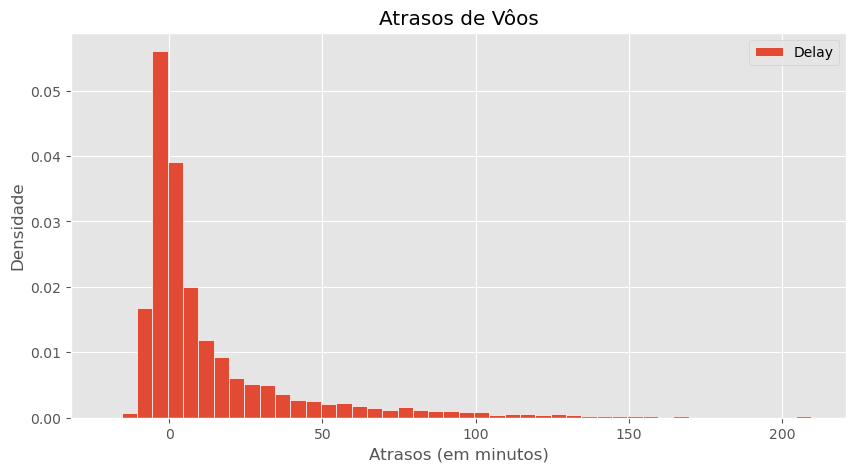

In [2]:
delays = pd.read_csv('https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/aulas/T%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o/data/united_summer2015.csv')
delays.plot(kind = 'hist', y = 'Delay', bins = np.arange(-20.5, 210, 5), density = True, ec = 'w', figsize = (10, 5))
plt.title('Atrasos de Vôos')
plt.xlabel('Atrasos (em minutos)')
plt.ylabel("Densidade");

**Pergunta**: Qual é maior na distribuição dos atrasos de vôos: a média ou a mediana?

In [3]:
delays['Delay'].mean()

16.658155515370705

In [4]:
delays['Delay'].median()

2.0

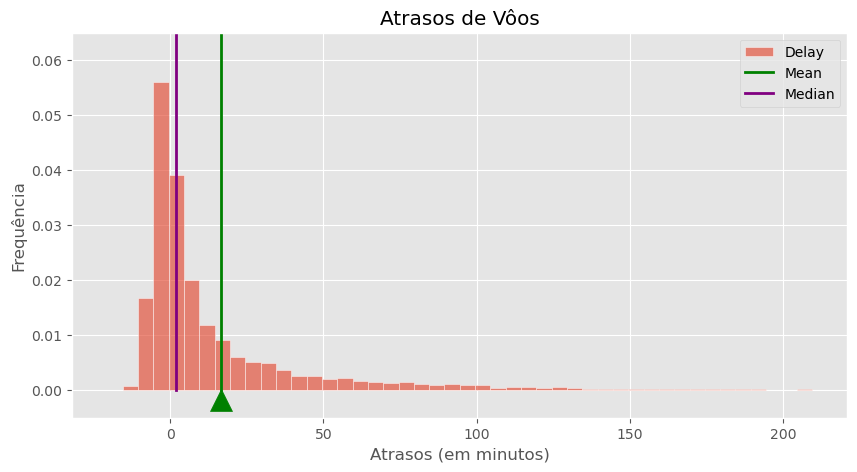

In [5]:
delays.plot(kind = 'hist', y = 'Delay', bins = np.arange(-20.5, 210, 5), density = True, ec = 'w', alpha = 0.65, figsize = (10, 5))
plt.plot([delays['Delay'].mean(), delays['Delay'].mean()], [0, 1], color = 'green', label = 'Mean', linewidth = 2)
plt.scatter([delays['Delay'].mean()], [-0.0017], color = 'green', marker = '^', s = 250)
plt.plot([delays['Delay'].median(), delays['Delay'].median()], [0, 1], color = 'purple', label = 'Median', linewidth = 2)
plt.title('Atrasos de Vôos')
plt.xlabel('Atrasos (em minutos)')
plt.ylim(-0.005, 0.065)
plt.legend()
plt.ylabel("Frequência");

#### Média

- **Definição**: Soma de todos os elementos da amostra, dividida pelo tamanho amostral $n$.
    - É comum denotarmos a média _populacional_ por $\mu$ e a média _amostral_ por $\bar{X}$.
    - Denotando nosso conjunto de observações por $\boldsymbol{X} := (X_1, \ldots, X_n)$, definimos então $\bar{X} := \frac{1}{n} \sum^n_{i=1} X_i$.

- Visualmente, a média amostral pode ser pensada como o "ponto de equilíbrio" de uma distribuição.
    - A soma das diferenças entre cada ponto e a média é sempre igual a 0.
    - Uma analogia é pensar na média amostral como o ponto de apoio de uma gangorra.

#### Mediana

- **Definição**: Ponto que divide a amostra ao meio.
    - Metade da distribuição está à direita da mediana, e a outra metade à esquerda.
    - Usualmente denotamos a mediana populacional por $med(\boldsymbol{X})$, e a mediana amostral por $\widehat{med}(\boldsymbol{X})$.

- A mediana é o percentil 50 de uma distribuição.
- Se uma distribuição é **simétrica** em torno de um valor, então esse valor coincide com _ambas_ média e mediana.
- Se uma distribuição é **assimétrica** (_à direita_ ou _à esquerda_), então a média será diferente da mediana (respectivamente, à direita ou à esquerda, de acordo com a direção da assimetria).

> **Propriedade importante**: A mediana é mais **robusta** (menos **sensível**) a **_outliers_/valores extremos/valores discrepantes** que a média.

### Exercício ✅

Considere os seguintes histogramas, correspondentes a duas distribuições diferentes:

<center>
    <table><tr>
        <td> <center><img src = "https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/aulas/T%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o/images/hist.jpg" width = 70%></center>  </td>
        <td> <center><img src = "https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/aulas/T%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o/images/hist2.jpg" width = 70%></center> </td>
    </tr></table>
</center>

Preencha agora a célula de texto abaixo com a alternativa **correta** relativa às distribuições acima:

**A**. Ambas média e mediana são iguais.

**B**. As médias são diferentes, mas as medianas são iguais.

**C**. As médias são iguais, mas as medianas são diferentes.

**D**. Ambas média e mediana são diferentes.

### Medidas de Dispersão

#### Desvio Padrão

**Pergunta**: Como caracterizamos a "largura" de uma distribuição? 🤔

- Uma ideia natural seria tomarmos o maior valor e subtrair pelo menor valor encontrado na distribuição.
    - Essa medida é conhecida como a **amplitude** (_range_, em inglês) da distribuição.
    - Apesar de intuitiva, a amplitude não nos diz muito sobre a _forma_ da distribuição.
    - Além disso, a amplitude (populacional) de muitas distribuições que utilizaremos na prática é infinita, ou não é bem definida.

- Uma outra possibilidade seria utilizarmos o _desvio padrão_ da distribuição.
    - O desvio padrão é uma medida do quanto, _em média_, as observações _estão distantes da média_.

#### Desvios em torno da média

- Para medir o quão distante cada observação está da média, simplesmente tomamos a diferença entre aquela observação e a média.
    -   Essa quantidade é conhecida como _desvio em torno da média_.
    -   Formalmente, se $X_i$ é a $i$-ésima observação da nossa amostra $\boldsymbol{X}$, definimos o _desvio de $X_i$ em torno da média amostral $\bar{X}$_ por $X_i - \bar{X}$, para $i = 1, \ldots, n$.

Considere então o seguinte exemplo:

In [6]:
data = np.array([2, 3, 3, 9])
np.mean(data)

4.25

In [7]:
deviations = data - np.mean(data)
deviations

array([-2.25, -1.25, -1.25,  4.75])

Cada entrada em `deviations` mede o desvio do elemento correspondente em `data` em torno da média (aqui, $\bar{X} = 4{,}25$).

E qual é o "desvio médio" (isto é, a média dos desvios) nesse caso?

In [8]:
np.mean(deviations)

0.0

- **Fato**: a média dos desvios em torno da média é _sempre igual a 0_, independente da distribuição analisada!
    - Dessa forma, o desvio médio em torno da média não é uma medida útil da dispersão de uma distribuição.

#### Desvios em torno da média, **ao quadrado**

Vamos agora tomar o **quadrado** dos desvios em torno da média:

In [9]:
## Elevando todos os desvios ao quadrado
deviations ** 2

array([ 5.06,  1.56,  1.56, 22.56])

... e então tomar a média _dos desvios ao quadrado_, $(X_i - \bar{X})^2$:

In [10]:
variance = np.mean(deviations ** 2)
variance

7.6875

A quantidade calculada acima, isto é, a _média dos desvios quadrados em torno da média_, é conhecido como **variância**.

#### Raiz quadrada da soma dos quadrados?

- Apesar da variância ser uma medida muito útil de dispersão, em geral ela possui um problema de interpretação: a _unidade_ na qual a variância é expressa não é igual à de cada $X_i$, mas sim de $X_i^2$!   
- Por exemplo, se nossos dados estão em $\text{USD}$ ou $\text{BRL}$ (dólares ou reais), a variância estará expressa em $\text{USD}^2$ ou $\text{BRL}^2$.
- Para contornar esse problema de interpretabilidade, tomamos então a _raiz quadrada_ da variância, e o resultado é conhecido como **desvio padrão**.

In [11]:
## O desvio padrão (DP) é dado pela raiz quadrada da variância!
sd = variance ** 0.5
sd

2.7726341266023544

#### Desvio padrão

- **Definição**: Raiz da média dos desvios (em torno da média) ao quadrado.
    - Usualmente denotamos a variância populacional por $\sigma^2$, o desvio padrão (DP) populacional por $\sigma$, e os análogos amostrais por $S$ e $S^2$.

Formalmente,

$$\begin{align*}
    S^2 &:= \frac{\sum^n_{i=1} (X_i - \bar{X})^2}{n}, & S &= \sqrt{S^2} = \sqrt{\frac{\sum^n_{i=1} (X_i - \bar{X})^2}{n}}.
\end{align*}$$

- O DP (que também é representado pela sigla em inglês, SD, de _standard deviation_) mede o _quão distantes_ os valores em uma distribuição estão de sua média.
    - Equivalentemente, **o DP mede o quão dispersos** os valores de uma distribuição (em torno de sua média) são.  
    - Dessa forma, quanto maior o DP, mais dispersos serão os dados.
    - Lembre que, crucialmente, o desvio padrão é _expresso nas mesmas unidades de $\boldsymbol{X}$_.

- A biblioteca `numpy` tem uma função, `np.std`, que calcula o desvio padrão de um `Array`:

In [12]:
np.std(data)

2.7726341266023544

## Padronização

### Exemplo: Alturas e pesos  📏

Para motivar os conceitos dessa subseção, vamos primeiro começar com um conjunto de dados contendo as alturas (em polegadas) e pesos (em libras) de $n = 5{,}000$ homens adultos dos EUA:

In [13]:
height_and_weight = pd.read_csv('https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/aulas/T%C3%B3pico%2016%20%E2%80%93%20Padroniza%C3%A7%C3%A3o/data/height_and_weight.csv')
height_and_weight

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
...,...,...
4997,67.01,199.20
4998,71.56,185.91
4999,70.35,198.90


### Distribuições das alturas e pesos

Primeiramente, vamos analisar a distribuição das variáveis do nosso conjunto de dados.

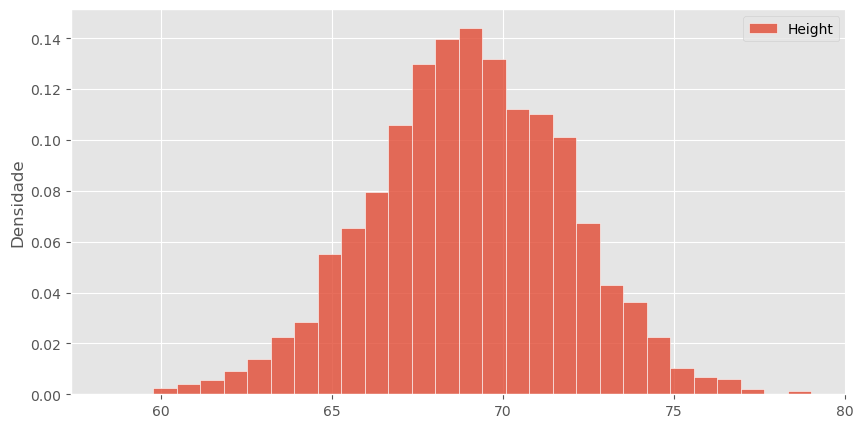

In [14]:
height_and_weight.plot(kind = 'hist', y = 'Height', density = True, ec = 'w', bins = 30, alpha = 0.8, figsize = (10, 5))
plt.ylabel("Densidade");

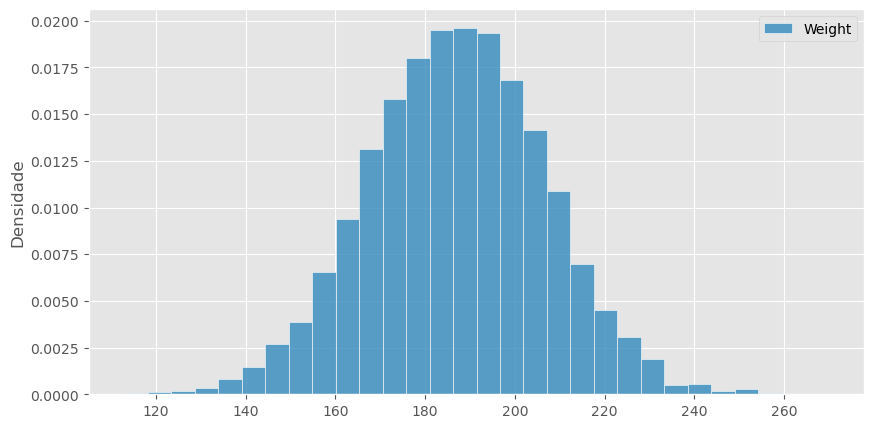

In [15]:
height_and_weight.plot(kind = 'hist', y = 'Weight', density = True, ec = 'w', bins = 30, alpha = 0.8, color = 'C1', figsize = (10, 5))
plt.ylabel("Densidade");

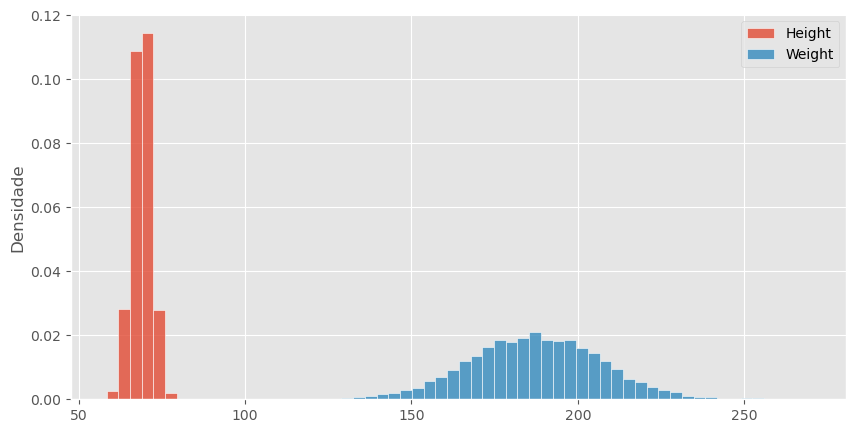

In [16]:
height_and_weight.plot(kind = 'hist', density = True, ec='w', bins = 60, alpha = 0.8, figsize = (10, 5))
plt.ylabel("Densidade");

As duas distribuições acima são aproximadamente versões "deslocadas" e "esticadas" da mesma forma, denominada informalmente de **"curva de sino"** (_bell curve_) 🔔.

> Mais formalmente, uma distribuição com essa forma é conhecida como **distribuição Normal**.

### Unidades padronizadas

- Suponha que $\boldsymbol{X} := (X_1, \ldots, X_n)$ seja uma amostra de uma variável numérica com média $\bar{X}$ e desvio padrão $S$. Então,

\begin{align*}
    X_{i \: \text{(su)}} := \frac{X_i - \bar{X}}{S}
\end{align*}

representa $X_i$ em **unidades padronizadas**, $i = 1, \ldots, n$.

- Podemos interpretar os valores das unidades padronizadas $X_{i \: \text{(su)}}$ como sendo "o _número de DPs ($S$) que $X_i$ está de sua média_ ($\bar{X}$)".
- Equivalentemente, se $X_{i \: \text{(su)}} = x \in \mathbb{R}$, então podemos dizer que $X_i$ está a $x$ DPs da sua média.

**Exemplo**: Suponha que uma pessoa pese 225 libras. Qual é o seu peso em unidades padronizadas?

In [17]:
weights = height_and_weight['Weight']
(225 - weights.mean()) / np.std(weights)

1.9201699181580767

- Interpretação: 225 está a 1.92 desvios-padrão acima da média dos pesos.
- 225 libras é igual a 1.92 em unidades padronizadas.

**Nota**: a padronização _sempre_ depende do valor de $\bar{X}$ e $S$, que são _específicos_ à cada distribuição. 

### Padronização

- O processo de conversão dos valores de uma variável para unidades padronizadas é conhecido como **padronização**. 
- Consequentemente, os valores $X_{i \: \text{(su)}}$ obtidos através da padronização são ditos **padronizados**.
- Dessa forma, denominamos $\boldsymbol{X_{\text{(su)}}} := (X_{1 \: \text{(su)}}, \ldots, X_{n \: \text{(su)}})$ de **amostra padronizada**, ou **versão padronizada** de $\boldsymbol{X}$.

In [18]:
## Função para padronizar as Series de um DataFrame
def standard_units(col):
    return (col - col.mean()) / np.std(col)

In [19]:
standardized_height = standard_units(height_and_weight['Height'])
standardized_height

0       1.68
1      -0.09
2       1.78
        ... 
4997   -0.70
4998    0.88
4999    0.46
Name: Height, Length: 5000, dtype: float64

In [20]:
standardized_weight = standard_units(height_and_weight['Weight'])
standardized_weight

0       2.77
1      -1.25
2       1.30
        ... 
4997    0.62
4998   -0.06
4999    0.60
Name: Weight, Length: 5000, dtype: float64

### O efeito da padronização

Variáveis padronizadas sempre têm:
- Média = 0.
- Variância = desvio padrão = 1.

É comum padronizarmos diferentes variáveis _simplesmente para termos todas na mesma escala_ para a nossa análise.

In [21]:
## Lembrete (notação científica): e-15 = 10^(-15), e assim em diante
standardized_height.describe()

count    5.00e+03
mean     1.49e-15
std      1.00e+00
           ...   
50%      4.76e-04
75%      6.85e-01
max      3.48e+00
Name: Height, Length: 8, dtype: float64

In [22]:
standardized_weight.describe()

count    5.00e+03
mean     5.95e-16
std      1.00e+00
           ...   
50%      6.53e-04
75%      6.74e-01
max      4.19e+00
Name: Weight, Length: 8, dtype: float64

Mais formalmente, temos:

- $\bar{X}_{\text{(su)}} = 0$ (isto é, a _média de $\boldsymbol{X_{\text{(su)}}}$ é igual a 0_);
- $S^2_{\text{(su)}} = S_{\text{(su)}} = 1$ (isto é, ambos _variância e desvio padrão de $\boldsymbol{X_{\text{(su)}}}$ são iguais a  1_).

### Histogramas padronizados

Agora que padronizamos os pesos e as alturas do exemplo acima, vamos ver mais uma vez como seus histogramas ficam lado-a-lado:

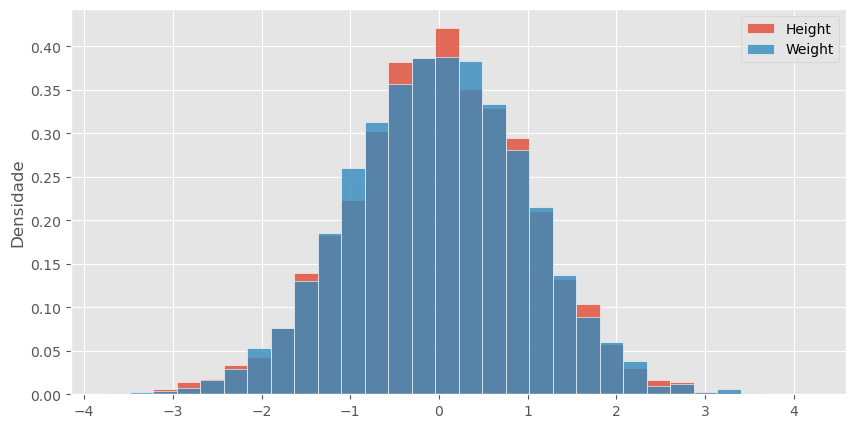

In [23]:
standardized_height_and_weight = pd.DataFrame(
    {
        "Height" : standardized_height,
        "Weight" : standardized_weight
    }
)
standardized_height_and_weight.plot(kind = 'hist', density = True, ec = 'w',bins = 30, alpha = 0.8, figsize = (10, 5))
plt.ylabel("Densidade");

Ambas distribuições são bem parecidas! 👍

**Nota**: embora a padronização mude a _locação e a escala_ de uma distribuição, os **percentis, frequências e probabilidades não se alteram**!

## Resumo

- A média e a mediana são medidas de tendência central.
- A variância e o desvio padrão (DP) são medidas de dispersão.
    - O DP é igual a raiz quadrada da variância.
    - Em linhas gerais, o desvio padrão mede, em média, o quão distantes da média os valores de uma distribuição estão.
- Para converter um valor $X_i$ para unidades padronizadas, fazemos $X_{i \: \text{(su)}} := \frac{X_i - \bar{X}}{S}$.
    - Valores em unidades padronizadas medem o número de desvios padrão ($S$) que $X_i$ está acima (ou abaixo) de sua média ($\bar{X}$).